✅ Datos cargados con éxito: 52 filas y 5 columnas.

--- Resumen Estadístico ---
            rank    population  population_per_rank
count  52.000000  5.200000e+01         5.200000e+01
mean   26.500000  6.200105e+06         5.484704e+05
std    15.154757  7.063774e+06         1.273379e+06
min     1.000000  5.841530e+05         1.123371e+04
25%    13.750000  1.796360e+06         8.483503e+04
50%    26.500000  4.191848e+06         1.721446e+05
75%    39.250000  6.824438e+06         3.839906e+05
max    52.000000  3.880250e+07         7.760500e+06


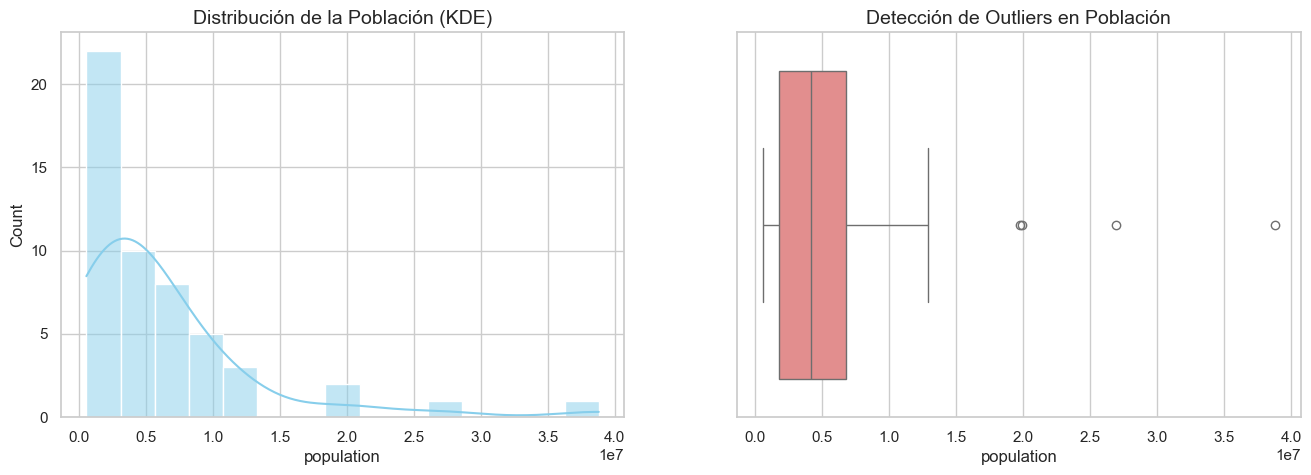

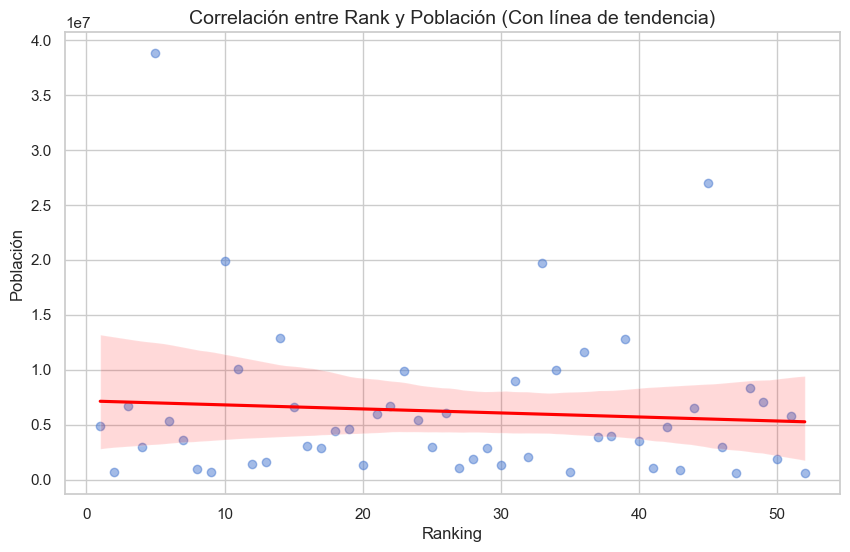

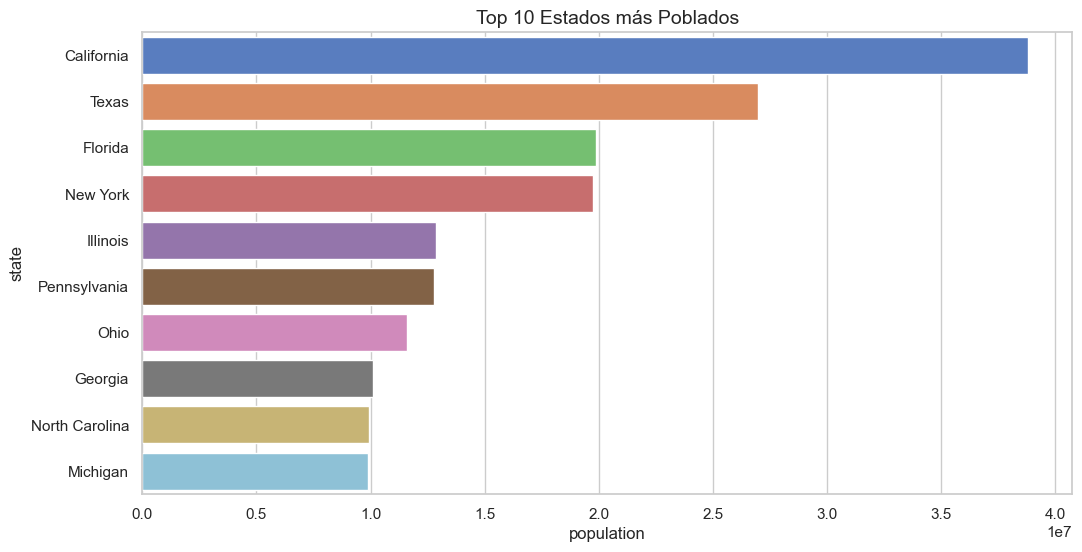

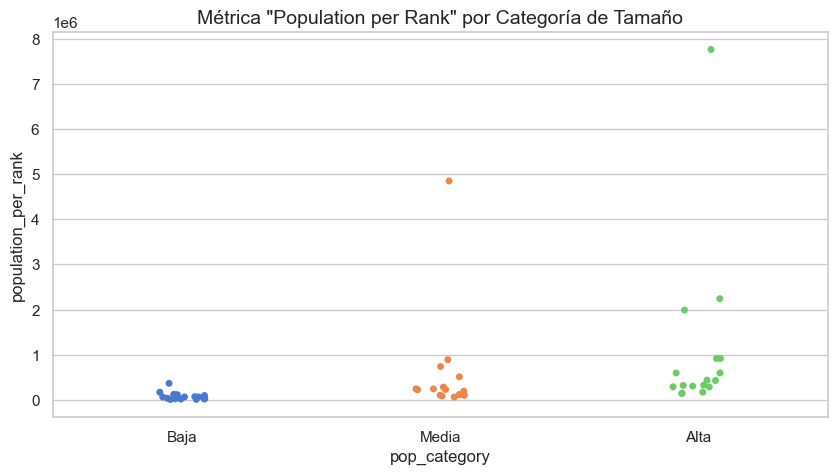

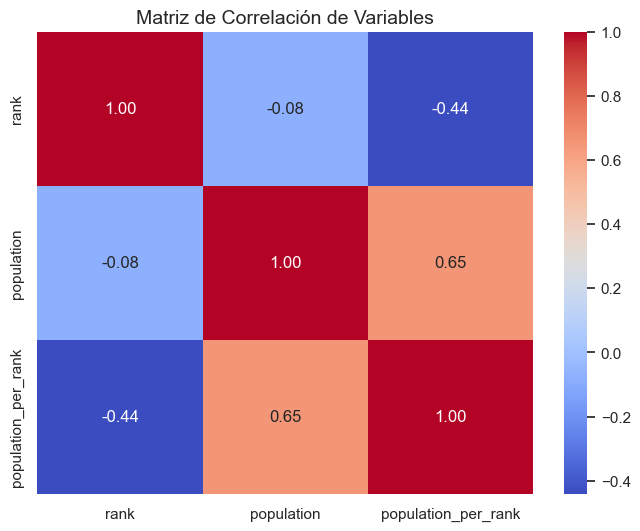

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Carga de datos (usando la ruta relativa desde la carpeta notebooks/)
DATA_PATH = '../data/clean/shipping_data_clean.csv'

if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    print(f"✅ Datos cargados con éxito: {df.shape[0]} filas y {df.shape[1]} columnas.")
else:
    print("❌ No se encontró el archivo. Asegúrate de ejecutar primero main.py")

# Configuración estética
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# --- FASE 1: Análisis de Calidad y Estadística ---
print("\n--- Resumen Estadístico ---")
print(df.describe())

# --- FASE 2: Análisis Univariante ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribución de Población
sns.histplot(df['population'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de la Población (KDE)', fontsize=14)

# Boxplot para detectar Outliers (Valores atípicos)
sns.boxplot(x=df['population'], ax=axes[1], color='lightcoral')
axes[1].set_title('Detección de Outliers en Población', fontsize=14)
plt.show()

# --- FASE 3: Análisis Bivariante (Relaciones) ---

# Relación Rank vs Population
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='rank', y='population', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlación entre Rank y Población (Con línea de tendencia)', fontsize=14)
plt.xlabel('Ranking')
plt.ylabel('Población')
plt.show()

# --- FASE 4: Visualización de Negocio (Top 10) ---
top_10 = df.nlargest(10, 'population')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='population', y='state', hue='state', legend=False)
plt.title('Top 10 Estados más Poblados', fontsize=14)
plt.show()

# --- FASE 5: Feature Engineering Exploratorio ---

# Creamos categorías de población para ver cómo se distribuye el ranking
df['pop_category'] = pd.qcut(df['population'], q=3, labels=['Baja', 'Media', 'Alta'])

plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='pop_category', y='population_per_rank', jitter=True, hue='pop_category', legend=False)
plt.title('Métrica "Population per Rank" por Categoría de Tamaño', fontsize=14)
plt.show()

# --- FASE 6: Matriz de Correlación ---
plt.figure(figsize=(8, 6))
# Solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables', fontsize=14)
plt.show()

📊 Se han detectado 1 estados con población atípica.


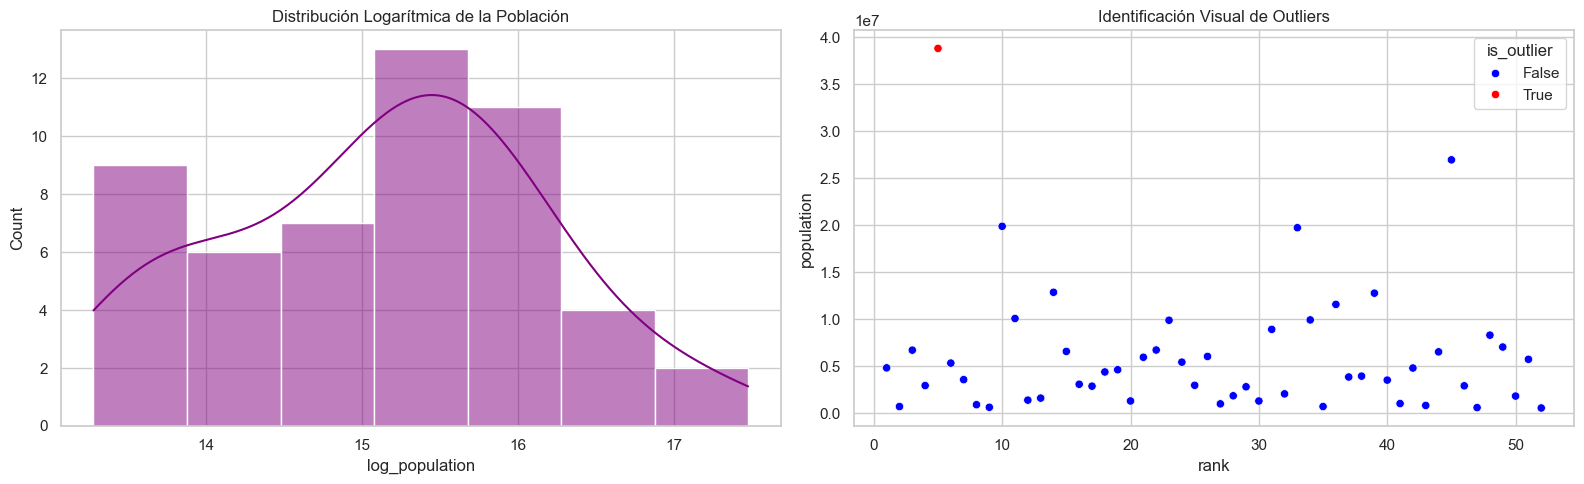

In [2]:
# --- FASE 7: Feature Engineering Avanzado ---

# 1. Creación de Variable Logarítmica
# Útil si la población tiene mucha desigualdad (Skewness), ayuda a los modelos lineales.
df['log_population'] = np.log1p(df['population'])

# 2. Variable de Densidad Relativa (Simulada)
# Asumiendo que el rank es una medida de importancia, creamos un ratio de intensidad.
df['importance_index'] = df['rank'] / df['population']

# 3. Identificación de "Outliers" mediante Z-Score
from scipy import stats
df['population_zscore'] = np.abs(stats.zscore(df['population']))
df['is_outlier'] = df['population_zscore'] > 3

print(f"📊 Se han detectado {df['is_outlier'].sum()} estados con población atípica.")

# --- FASE 8: Visualización de Outliers y Transformaciones ---

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Visualizar la transformación logarítmica (hace la distribución más "normal")
sns.histplot(df['log_population'], kde=True, ax=axes[0], color='purple')
axes[0].set_title('Distribución Logarítmica de la Población', fontsize=12)

# Scatter plot resaltando Outliers
sns.scatterplot(data=df, x='rank', y='population', hue='is_outlier', palette={True: 'red', False: 'blue'}, ax=axes[1])
axes[1].set_title('Identificación Visual de Outliers', fontsize=12)

plt.tight_layout()
plt.show()

In [3]:
import sys
import pandas as pd
print(f"Estás usando el Python de: {sys.executable}")

Estás usando el Python de: c:\Users\JUAN\shipping_etl_project\venv\Scripts\python.exe
